In [73]:
import requests, StringIO, pandas as pd, json, re, matplotlib.pyplot as plt, numpy as np
from pandas.tseries.offsets import *

In [74]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [75]:
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_0f7215bb_0b9e_4e91_b9b9_8c0d8dfc3f42',
  'project_id':'bb4d27f9a6604a00abe42e6c4b9163aa',
  'region':'dallas',
  'user_id':'886c42d512454815b71f2549b4db1092',
  'domain_id':'9d15a5cfdf4a41b183c24f40ed3f9166',
  'domain_name':'1137375',
  'username':'admin_e4d97a89c034e925c3148f8e7aef1c272f5cf01d',
  'password':"""o7.[kcsYJ}.o7Wh.""",
  'filename':'Restaurant_Inspection_Scores.csv',
  'container':'notebooks',
  'tenantId':'s37b-2b9482f211849b-b0681b4f837d'
}

In [76]:
content_string = get_file_content(credentials_1)
restaurant_df = pd.read_csv(content_string)

In [77]:
restaurant_df.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,Shogun,78748,7/10/14,82,"1807 W SLAUGHTER LN\rAUSTIN, TX 78748\r(30.173...",2800750,Routine Inspection
1,Speedy Stop Store #219,78723,3/26/15,92,"1660 E 51ST ST\rAUSTIN, TX 78723\r(30.304307, ...",2803642,Routine Inspection
2,Speedy Mart,78750,4/29/16,98,"10300 ANDERSON MILL RD\rAUSTIN, TX 78750\r(30....",2803804,Routine Inspection
3,Sodexo @ Bae Systems-Unit 27,78725,4/16/15,88,"6500 TRACOR LN Bldg 27\rAUSTIN, TX 78725\r(30....",10207265,Routine Inspection
4,Sleep Inn & Suites,78728,3/6/14,97,"14004 OWEN TECH BLVD\rAUSTIN, TX 78728\r(30.42...",10785754,Routine Inspection


In [78]:
restaurant_df.tail()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
24211,State Theatre,78701,11/26/14,92,"719 CONGRESS AVE\rAUSTIN, TX 78701\r(30.269711...",2801218,Routine Inspection
24212,Split Level,78701,2/20/15,84,"300 E 6TH ST\rAUSTIN, TX 78701\r(30.267328, -9...",10939459,Routine Inspection
24213,Stepping Stone School,78750,3/23/16,95,"12301 HYMEADOW DR\rAUSTIN, TX 78750\r(30.45428...",10243103,Routine Inspection
24214,Spring Hill Grocery,78660,2/24/14,100,"15608 SPRING HILL LN\rAUSTIN, TX 78660\r(30.44...",10353638,Routine Inspection
24215,Speedy Mart,78750,9/22/14,97,"10300 ANDERSON MILL RD\rAUSTIN, TX 78750\r(30....",2803804,Routine Inspection


In [79]:
#sorting restaurants according to inspection date
mask = (restaurant_df['Inspection Date'] > 11/26/2014)
restaurant_df[mask].sort_values(by="Inspection Date",ascending=True)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
3071,HEB Food Store #465,78702,1/10/14,89,"2701 E 7TH ST\rAUSTIN, TX 78702\r(30.26054, -9...",2800609,Routine Inspection
4595,La Quinta Inn #0522,78741,1/10/14,93,"1603 E OLTORF ST\rAUSTIN, TX 78741\r(30.233447...",2803265,Routine Inspection
20848,KFC Y343100,78729,1/10/14,90,"13435 N US 183 HWY NB\rAUSTIN, TX 78729\r(30.4...",10005095,Routine Inspection
9956,T. V. Dinners,78704,1/10/14,92,"1124 S IH 35 SVRD SB\rAUSTIN, TX 78704\r(30.24...",10565668,Routine Inspection
3606,Howard Johnson Inn,78741,1/10/14,90,"2711 S IH 35 SVRD NB\rAUSTIN, TX 78741\r(30.22...",10652033,Routine Inspection
3070,HEB Food Store #465 - Retail,78702,1/10/14,96,"2701 E 7TH ST\rAUSTIN, TX 78702\r(30.26054, -9...",2803572,Routine Inspection
11920,Westwood's Lakeview Cafe,78731,1/10/14,93,"3808 W 35TH ST\rAUSTIN, TX 78731\r(30.312707, ...",2802045,Routine Inspection
12562,7-Eleven Convenience Store #34253,78660,1/10/14,90,"15010 FM 1825 RD\rAUSTIN, TX 78660\r(30.442822...",10723015,Routine Inspection
261,Starbucks Coffee #8632,78704,1/10/14,100,"2300 S IH 35 SVRD SB\rAUSTIN, TX 78704\r(30.23...",2802363,Routine Inspection
13332,BC - Kwik Chek #55,78738,1/10/14,94,"14417 W SH 71 Bldg A\rBEE CAVE, TX 78738\r(30....",10374866,Routine Inspection


In [80]:
#query number of violations(score less than 70) in different areas(zip code) for past one year
restaurant_df['Inspection Date'] = pd.to_datetime(restaurant_df['Inspection Date'])
mask = ((restaurant_df['Inspection Date'] > (pd.datetime.today() - pd.DateOffset(years=1)).strftime("%m/%d/%Y")) & (restaurant_df['Inspection Date'] <= pd.datetime.today().strftime("%m/%d/%Y")) & (restaurant_df['Score'] < 70))
temp = restaurant_df[mask].sort_values(by="Score",ascending=True)
restaurant_df1 = temp[['Score','Zip Code']]
restaurant_df1 = pd.DataFrame({'count' : restaurant_df1.groupby(['Zip Code']).size()})
restaurant_df1

,count
Zip Code,
78612,1
78617,3
78653,1
78701,4
78702,1
78703,1
78704,10
78705,6
78719,1


In [81]:
%matplotlib inline

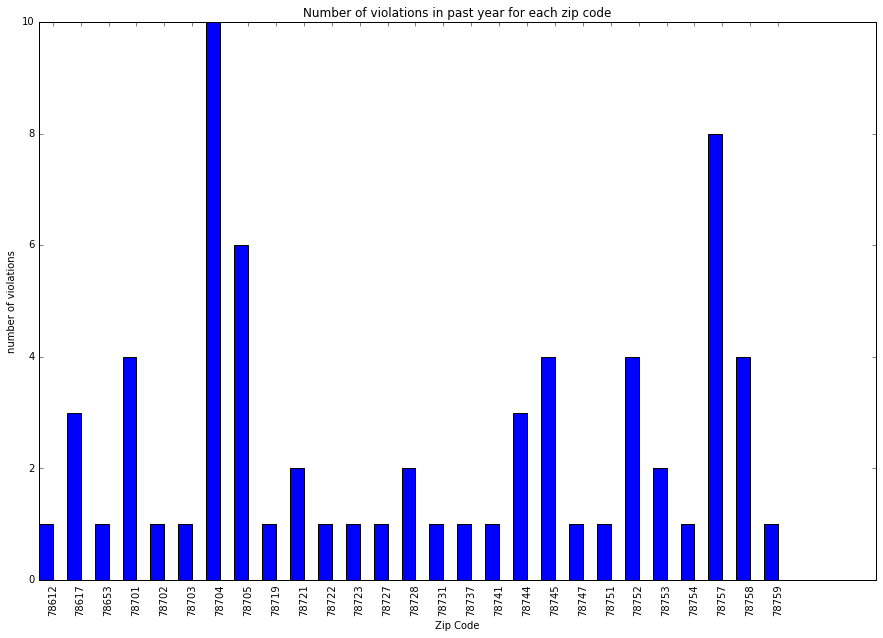

In [82]:
#plot graph to show number of violations(score less than 70) in different areas(zip code) for past one year
zipcode =  restaurant_df1.index.map(int)
zipcode_arranged = np.arange(len(zipcode))
count = restaurant_df1.values
plt.figure(figsize=(15,10))
bar_width = 0.5
plt.bar( zipcode_arranged,count, bar_width, color='blue')
plt.xlabel("Zip Code")
plt.ylabel("number of violations")
plt.title("Number of violations in past year for each zip code")
plt.xticks(zipcode_arranged + bar_width, zipcode, rotation=90)
plt.show()

In [83]:
#query number of times the score was less than 60 for different restaurants till date
restaurant_df['Inspection Date'] = pd.to_datetime(restaurant_df['Inspection Date'])
mask = ((restaurant_df['Score'] < 60))
temp = restaurant_df[mask].sort_values(by="Score",ascending=True)
restaurant_df2 = temp[['Score','Restaurant Name']]
restaurant_df2 = pd.DataFrame({'count' : restaurant_df2.groupby(['Restaurant Name']).size()})
restaurant_df2

,count
Restaurant Name,
888 Vietnamese,2
Biryani & Co.,1
Bombay Bistro,1
Buffet King,1
Buffet Palace,1
Casa Moreno,2
Central Market: Prepared Foods,1
China Dynasty,1
Chinatown Restaurant,1


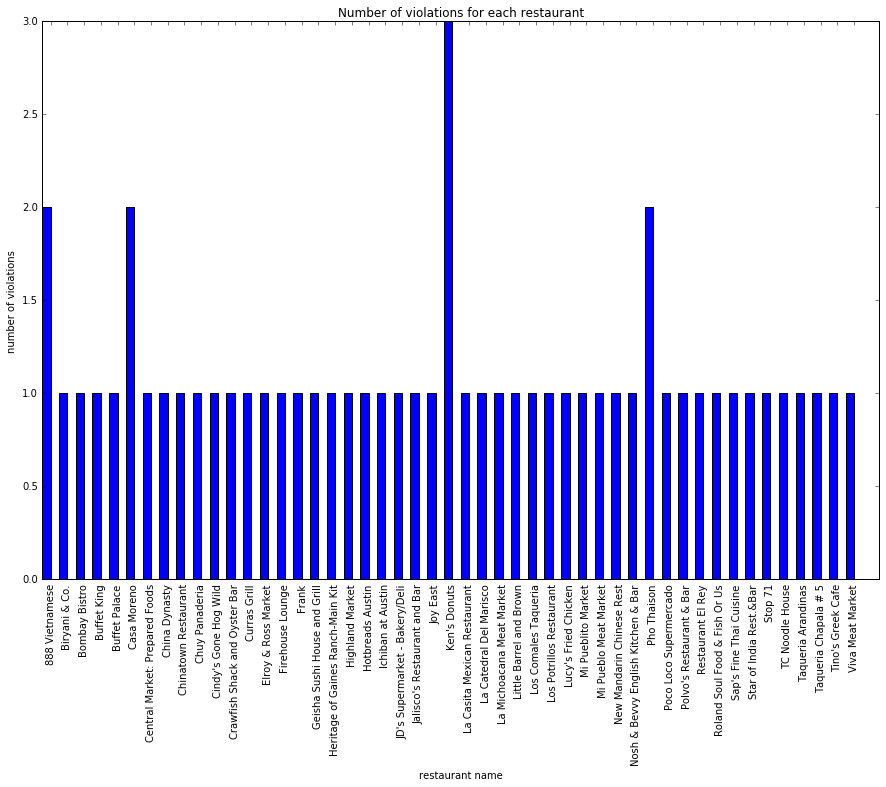

In [84]:
#graph to plot number of times the score was less than 60 for different restaurants till date
restaurant_name =  restaurant_df2.index
restaurant_name_arranged = np.arange(len(restaurant_name))
count = restaurant_df2.values
plt.figure(figsize=(15,10))
bar_width = 0.5
plt.bar( restaurant_name_arranged,count, bar_width, color='blue')
plt.xlabel("restaurant name")
plt.ylabel("number of violations")
plt.title("Number of violations for each restaurant")
plt.xticks(restaurant_name_arranged + bar_width, restaurant_name, rotation=90)
plt.show()

In [85]:
#query number of times a restaurant had 2nd Follow Up inspection
mask = ((restaurant_df['Process Description'] == '2nd Follow Up to 50 - 69'))
restaurant_df3 = temp[['Process Description','Restaurant Name']]
restaurant_df3 = pd.DataFrame({'count' : restaurant_df3.groupby(['Restaurant Name']).size()})
restaurant_df3

,count
Restaurant Name,
888 Vietnamese,2
Biryani & Co.,1
Bombay Bistro,1
Buffet King,1
Buffet Palace,1
Casa Moreno,2
Central Market: Prepared Foods,1
China Dynasty,1
Chinatown Restaurant,1


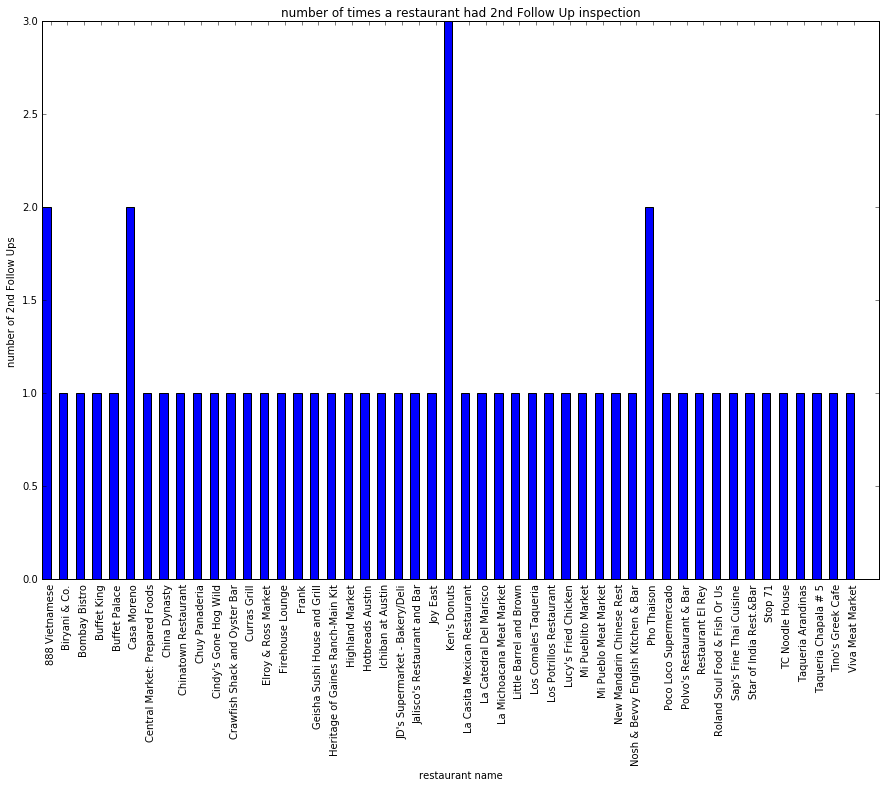

In [88]:
#graph to plot number of times a restaurant had 2nd Follow Up inspection
restaurant_name1 =  restaurant_df3.index
restaurant_name_arranged1 = np.arange(len(restaurant_name1))
count1 = restaurant_df3.values
plt.figure(figsize=(15,10))
bar_width = 0.5
plt.bar( restaurant_name_arranged1,count1, bar_width, color='blue')
plt.xlabel("restaurant name")
plt.ylabel("number of 2nd Follow Ups")
plt.title("number of times a restaurant had 2nd Follow Up inspection")
plt.xticks(restaurant_name_arranged1 + bar_width, restaurant_name1, rotation=90)
plt.show()